In [1]:
import os


In [ ]:

# Get the current directory
current_dir = os.getcwd()
# get the parent directory
parent_dir = os.path.dirname(current_dir)

# Get the first directory in the parent directory
directories = os.listdir(parent_dir)
print("The directories in the parent directory are:", directories) 
first_directory = os.path.join(parent_dir, directories[0])
d = os.listdir(first_directory)
print(d)
print("The first directory in the parent directory is:", first_directory)
# Count the number of files in the first directory
file_count = len(os.listdir(first_directory))

print("Number of files in the first directory:", file_count)


104


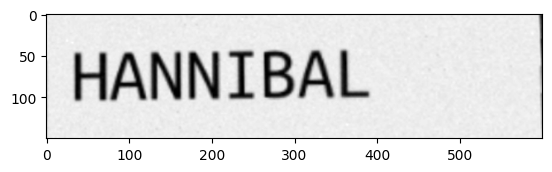

In [4]:
import matplotlib.pyplot as plt
import cv2

data_path = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/'
populated_banner_path = os.path.join(data_path, 'populated_banner')

d = len(os.listdir(populated_banner_path))
print(d)

img = cv2.imread(os.path.join(populated_banner_path, os.listdir(populated_banner_path)[5]))
testimg = cv2.imread(os.path.join(data_path, 'test/test_img14.png'))
plt.imshow(testimg[220:370,:,1], cmap='gray')

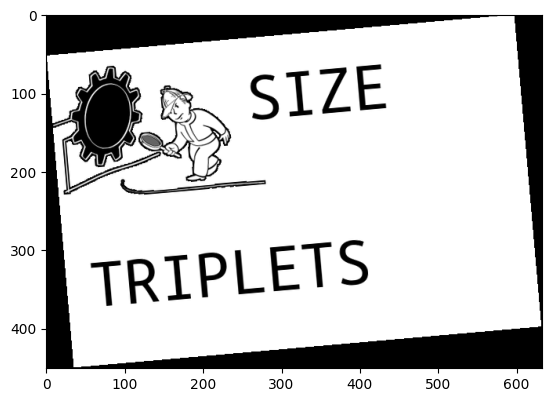

In [5]:
import scipy.ndimage as ndimage

# Rotate the image 10 degrees clockwise
rotated = ndimage.rotate(img[:,:,1], 5)

# Display the rotated image
plt.imshow(rotated, cmap='gray')


In [190]:
import numpy as np
def add_gaussian_noise(image, mean=0, std=1):
    noise = np.random.normal(mean, std, image.shape).astype(image.dtype)
    noisy_image = cv2.add(image, noise)
    return noisy_image

(140, 600)


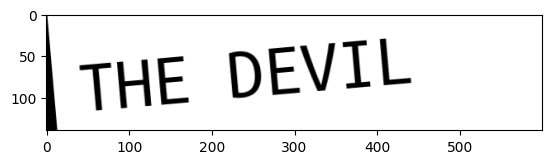

In [165]:
rows, cols = img[:,:].shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),5,1)
a = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(a[230:370,:], cmap='gray')
print(a[230:370,:].shape)

In [162]:
source_path = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/populated_banner'
destination_path = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/training_set'

banner_names = os.listdir(source_path)
print(banner_names[0][2:-4])
print(np.arange(1,6,1.5))

314
[1.  2.5 4.  5.5]


In [1]:
import os
source_path = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/populated_banner'
destination_path = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/noisy_training_set'


In [ ]:

banner_names = os.listdir(source_path)

for banner in banner_names:

    img = plt.imread(os.path.join(source_path, banner))[:,:,1]

    name = banner[2:-4]

    if not os.path.exists(os.path.join(destination_path, name)):
        os.mkdir(os.path.join(destination_path, name))

    for angle in [1, 2, 3, -3, -2, -1]:
        
        for noise in range(2):
            rows, cols = img.shape
            rot_mtx = cv2.getRotationMatrix2D((cols/2,rows/2), angle, 1)
            new_img = cv2.warpAffine(img , rot_mtx, (cols,rows))[230:370,:]

            if noise == 1:
                new_img = add_gaussian_noise(new_img, std=0.1)
                
            plt.imsave(os.path.join(destination_path, name, name + '_' + str(noise) + '_' + str(angle) + '.png'), new_img, cmap='gray')

    for noise in [0.1, 0.15, 0.2]:
        noisy_img = add_gaussian_noise(img[230:370,:], std=noise)
        plt.imsave(os.path.join(destination_path, name, name + '_' + str(noise) + '.png'), noisy_img, cmap='gray')

    for i in range(1):
        plt.imsave(os.path.join(destination_path, name, name + '_' + str(i) + '.png'), img[230:370,:], cmap='gray')


In [188]:
print(os.listdir(destination_path))

['2023', '314', 'ACCELERATE', 'ACCIDENT', 'ALIENS', 'ANTIMATTER', 'ANTS', 'AUTUMN', 'BACTERIA', 'BARBIE', 'BASEMENT', 'BATMAN', 'BEACH', 'BED BUGS', 'BENU', 'BITE', 'BOREDOM', 'BUNNIES', 'CAESAR', 'CAO CAO', 'CAVE', 'CITIZENS', 'CLASS', 'COUNTLESS', 'CURIOSITY', 'CURSE', 'D DAY', 'DAWN', 'DECELERATE', 'DEFRAUD', 'DESTROY', 'DINOSAURS', 'DOZEN', 'DUSK', 'EINSTEIN', 'ELECTRON', 'FAME', 'FEAR', 'FIRE', 'FOREST', 'FRODO', 'GLUTTONY', 'GODZILA', 'GOKU', 'GREED', 'HANNIBAL', 'HATE', 'HEADBUT', 'HIGH VOLTAGE', 'HOSPITAL', 'IGNORANCE', 'IRRADIATE', 'JEDIS', 'JUNGLE', 'JURASIC', 'LEGIONS', 'LIE TO', 'LOVE', 'LUIGI', 'MALL', 'MARS', 'MIDNIGHT', 'MOON', 'NEUTRINOS', 'NOON', 'PARROTS', 'PASSION', 'PENCIL', 'PHYSICISTS', 'PIKACHU', 'PLASMA', 'POLONIUM', 'POTATO GUN', 'PRIDE', 'PUNCH', 'Q DAY', 'RAYO10', 'REVENGE', 'ROBOTS', 'ROCKET', 'ROPE', 'SAURON', 'SELF DEFENSE', 'SEWERS', 'SHREK', 'SHURIKEN', 'SPRING', 'STEAL', 'STICK', 'SUMMER', 'TELEPORT', 'TEMUJIN', 'THANOS', 'THE DEVIL', 'THE HOOD', 'THRIL

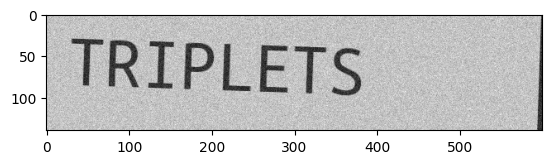

In [233]:
img = plt.imread(os.path.join(destination_path, 'TRIPLETS', 'TRIPLETS_1_-2.png'))
plt.imshow(img, cmap='gray')
# create 
char_list = []
step = 0

for char in list('TRIPLETS'):
    char_list.append((img[:,30+45*step:30+(step+1)*45], char))
    step += 1


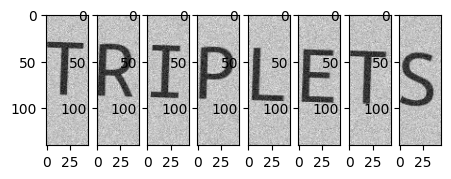

In [234]:
plt.subplot(1, 10, 1)
plt.imshow(char_list[0][0], cmap='gray')
plt.subplot(1, 10, 2)
plt.imshow(char_list[1][0], cmap='gray')
plt.subplot(1, 10, 3)
plt.imshow(char_list[2][0], cmap='gray')
plt.subplot(1, 10, 4)
plt.imshow(char_list[3][0], cmap='gray')
plt.subplot(1, 10, 5)
plt.imshow(char_list[4][0], cmap='gray')
plt.subplot(1, 10, 6)
plt.imshow(char_list[5][0], cmap='gray')
plt.subplot(1, 10, 7)
plt.imshow(char_list[6][0], cmap='gray')
plt.subplot(1, 10, 8)
plt.imshow(char_list[7][0], cmap='gray')
# 30:75

True

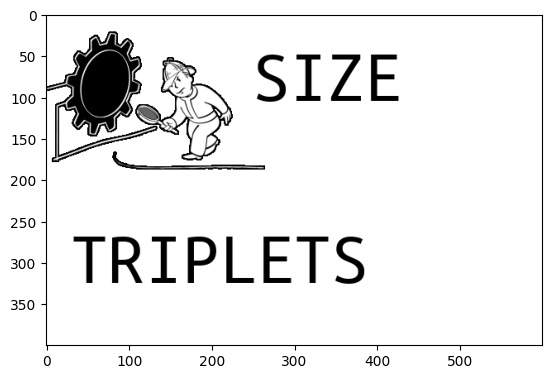

In [173]:
plt.imshow(img[:,:,1], cmap='gray')
cv2.imwrite('test_img.png', img[:,:,1])

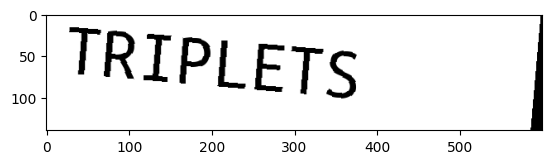

In [125]:
from PIL import Image 

# Giving The Original image Directory  
# Specified 
Original_Image = Image.open('C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/populated_banner/1,TRIPLETS.png') 
  
# Rotate Image By 180 Degree 
rotated_image1 = np.array(Original_Image.rotate(-5))
# This is Alternative Syntax To Rotat

# Display Rotated Image
plt.imshow(rotated_image1[230:370,:,1], cmap='gray')

In [14]:
import cv2
import numpy as np
import os

class DataProcessor:

    left_bound = 30
    char_step = 45    
    upper_bound = 240
    lower_bound = 360

    def __init__(self, source) -> None:
        self.source = source
        self.banner_names = os.listdir(source)

    def geta(self) -> None:
        return 1

    def storeModifiedClues(self, target, numReg = 1, numRot=6, numBlur=1, numNoisy=1) -> None:
        for banner in self.banner_names:
            name = banner[2:-4]
            clue = ClueModifier(os.path.join(self.source, banner), name)

            if not os.path.exists(os.path.join(target, name)):
                os.mkdir(os.path.join(self.source, name))

            for i in range(numReg):
                self.save(clue.getData(), name, target, str(0)+str(i))

            for i in range(numBlur):
                self.save(clue.getBlurred(), name, target, str(1)+str(i))

            for i in range(numNoisy):
                self.save(clue.getNoisy(0.1), name, target, str(2)+str(i))
            
            for angle in [1, 2, 3, -3, -2, -1]:                
                for noise in range(2):
                    new_clue = ClueModifier(clue.getRotated(angle))
                    if noise == 1:
                        self.saveClue(new_clue.getNoisy(0.1), name, target, str(4)+str(angle)+str(noise))
                    else:
                        self.saveClue(new_clue.getData(), name, target, str(4)+str(angle)+str(noise))
            
            for i in range(numNoisy):
                self.save(clue.getNoisy(0.15), name, target, str(3)+str(noise))
            
            return True

    def storeCleanClues(self, target) -> None:
        for banner in self.banner_names:
            name = banner[2:-4]
            clue = ClueModifier(os.path.join(self.source, banner), name)

            if not os.path.exists(os.path.join(target, name)):
                os.mkdir(os.path.join(self.source, name))

            self.save(clue.getData(), name, target, str(0))
        
        return True

    def storeChars(self, source, target) -> None:
        
        for clue in os.listdir(source):
            for sample in os.listdir(os.path.join(source, clue)):
                chars = self.parseClue(os.path.join(source, clue, sample), clue)

                for char in chars:
                    if not os.path.exists(os.path.join(target, char[1])):
                        os.mkdir(os.path.join(target, char[1]))
                    self.save(char[0], char[1], target, len(os.listdir(os.path.join(target, char[1]))))

        return True

    def save(self, data, name, target, id) -> None:
        cv2.imwrite(os.path.join(target, name, name + '_' + str(id) + '.png'), data)
        
        return True

    def parseClue(self, path, clue) -> list:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

        char_list = []
        step = 0

        for char in list(clue):
            if (char == ' '):
                tag = 'SPACE'
            else:
                tag = char
            char_list.append((img[10:130, step*self.char_step+self.left_bound:self.left_bound+(step+1)*self.char_step], tag))
            step += 1
        
        return char_list

class ClueModifier:

    top = 240
    bottom = 360

    def __init__(self, path, tag) -> None:
        self.tag = tag
        
        if (path is str):
            img = cv2.imread(path)[:,:,1]
            self.data = img[:,:,1]
        else:
            self.data = path
        
    def getTag(self) -> str:
        return self.tag
    
    def getData(self) -> np.ndarray:
        return self.data[self.top:self.bottom]
    
    def getRotated(self, angle):
        rows, cols = self.data.shape
        M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
        new_img = cv2.warpAffine(self.data,M,(cols,rows))

        return new_img[self.top:self.bottom]
    
    def getNoisy(self, noise):
        noise = np.random.normal(0, noise, self.getData().shape).astype(self.data.dtype)
        new_img = cv2.add(self.data, noise)

        return new_img
    
    def getBlurred(self, blur=3):
        new_img = cv2.GaussianBlur(self.getData(), (blur, blur), 0)

        return new_img


In [15]:
dp = DataProcessor(source_path)
targ = 'C:/MohammadMahdi/University/Third Yr/ENPH 353/Labs/ENPH353_Comp_CNN/data/characters'
p = dp.storeChars(destination_path, targ)
print(p)

KeyboardInterrupt: 

(140, 45)


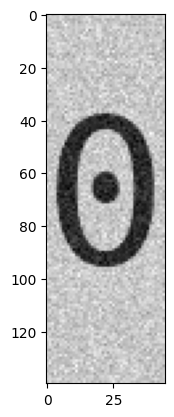

In [11]:
import matplotlib.pyplot as plt
a = plt.imread(os.path.join(targ, '0', '0_0.png'))
plt.imshow(a, cmap='gray')
print(a.shape)